In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd 
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

In [157]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [347]:
data = pd.read_csv('../raw_data.csv', names=['reg', 'url', 'cost', 'duration'], index_col=[0,1])

In [429]:
%store -r organic

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [348]:
#curr_month = data.index[-1][0]
#data.ix[curr_month]
data

reg                                                url  \
2017-05-31 0    spb  https://yandex.ru/yaca/tungrp/cat/Private_Life...   
           1    spb  https://collections.yandex.ru/user/spb-love-fo...   
           2   both                                    https://sape.ru   
           3   both                                   https://etxt.biz   
           4    msk                             http://tableplanner.ru   
           5    spb                                 http://icanfoto.ru   
           6    msk      http://www.svadba-inform.ru/scat1005_0_1.html   
           7    msk  http://www.scorosvadba.ru/catalog/showorg-2025...   
           8    msk  http://tilbagevise.ru/%D1%81%D0%B2%D0%B0%D0%B4...   
           9    msk                       http://www.urasvadba.ru/4062   
           10   msk        http://www.urasvadba.ru/4062(2 доп. ссылки)   
           11  both           http://my-svadba.ru/company/item/151379/   
           12   msk               http://my-svadba.ru/blog/item/43675/   
           13   msk       https://handbookbride.ru/catalogue-firm/msk/   
           14   msk    https://svadbogid.ru/svadebnye-salony/id003721/   
           15   msk                 http://mir-svadbi.ru/love-forever/   
           16   msk                https://porapoparam.ru/catalog/5628   
           17   msk         https://weddywood.ru/members/love-forever/   
           18   msk  http://msk.the-wedding.ru/svadebnye-platya/lov...   
           19   msk           https://wedwillow.ru/profi/love_forever/   
           20   msk  http://www.svadbaspb.ru/article/sovet_dress201...   
           21   spb        http://www.svadbaspb.ru/dress/(регистрация)   
           22   spb                 http://www.svadbaspb.ru/dress/133/   
           23   msk  http://www.svadba-online.ru/advices/zheltoe_sv...   
           24   msk  https://wedly.ru/catalog/moscow/svadebnyj-salo...   
           25   msk                  http://www.svadbuzz.ru/user/17981   
           26   msk  http://www.svadbuzz.ru/diaries/svadebnye-platy...   
           27   msk                 https://www.ds77.ru/firms/1877742/   
           28   msk              http://svadba69.ru/view_bib.php?id=27   
           29   msk  http://amur62.ru/stat/svadebnyie-platya-dlya-b...   
           30   msk  http://zavtrasvadba.ru/glavnaya/poleznoe/531-k...   
           31   msk  http://www.mir-svadba.ru/articles/svadiebnyi-o...   
           32   msk  https://svadbagolik.ru/article/brendovye-svade...   
           33   msk  http://svadba.bz/Russian/moda_na_svadebnoe_kru...   
           34   msk               http://my-svadba.ru/blog/item/43721/   
           35   msk  http://msk.12svadeb.ru/maps/svadebnye-platja/l...   

                   cost  duration  
2017-05-31 0   17110.00        12  
           1    1955.00        12  
           2    1139.00         1  
           3    2575.00         1  
           4     606.30         1  
           5       0.00        12  
           6       0.00        12  
           7       0.00        12  
           8       0.00        12  
           9    1000.00         1  
           10   1000.00        12  
           11   5426.87         6  
           12      0.00        12  
           13    452.25        12  
           14      0.00        12  
           15   1009.50        12  
           16   1085.40         1  
           17      0.00        12  
           18      0.00        12  
           19      0.00        12  
           20   3015.00        12  
           21   1500.00        12  
           22    510.00         1  
           23   3015.00        12  
           24      0.00        12  
           25      0.00        12  
           26      0.00        12  
           27      0.00        12  
           28   1009.50        12  
           29    502.50        12  
           30    500.00        12  
           31   1507.50        12  
           32   4020.00        12  
           33    404.00        12  
           34    

<p><a href="">Скачать</a> файл с исходными данными</p>
<p><a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию</p>
<p>**cost** — стоимость размещения: 0 — условно бесплатно.</p>
**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

### Расходы в разрезе регионов

In [354]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data, values='cost', index=['reg'], aggfunc=sum, margins=True)

reg
both     9140.87
msk     19126.95
spb     21075.00
All     49342.82
Name: cost, dtype: float64

## 2. Анализ трафика

Таблица с данными о поисковом трафике за 17 месяцев.

In [432]:
organic

,traffic,MoM,YoY
month,,,
2016-01-31,16046.0,NaN,NaN
2016-02-29,17191.0,6.660462,NaN
2016-03-31,17825.0,3.556802,NaN
2016-04-30,17671.0,-0.871484,NaN
2016-05-31,18611.0,5.050776,NaN
2016-06-30,18821.0,1.115775,NaN
2016-07-31,17058.0,-10.335327,NaN
2016-08-31,15728.0,-8.456256,NaN
2016-09-30,13497.0,-16.529599,NaN


Источник: https://metrika.yandex.ru

<p>**YoY** — изменения год к году, %
<br/>**MoM** — изменения месяц к месяцу, %</p>

### Подсветка данных

In [360]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [362]:
highlight_data = organic.reset_index().style.format({'month': "{:%Y-%m}"})
data_neg_select = highlight_data.applymap(color_negative_red, subset=['traffic', 'YoY', 'MoM'])

In [363]:
data_neg_select

Отрицательные изменения выделены красным.

### Диаграмма изменеия значений MoM 

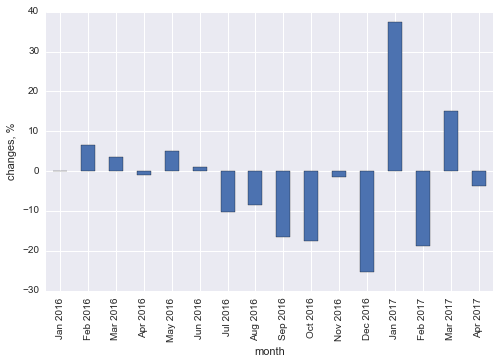

In [433]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
organic.MoM.plot(ax=ax, kind='bar', stacked=True);
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic.index]);

## 3. Анализ позиций